<a href="https://colab.research.google.com/github/igorjoz/machine-learning-course-and-projects/blob/main/24_MNIST_digits_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

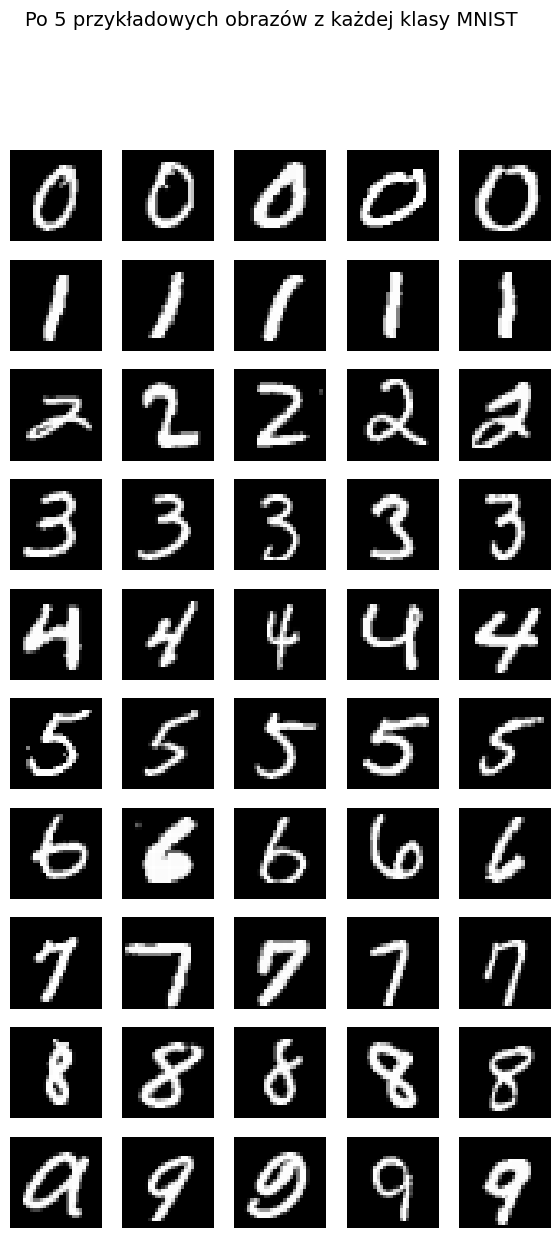

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

(x_train, y_train), _ = mnist.load_data()

fig, axes = plt.subplots(nrows=10, ncols=5, figsize=(7, 14))
fig.suptitle("Po 5 przykładowych obrazów z każdej klasy MNIST", fontsize=14)
rng = np.random.default_rng()

for digit in range(10):
    idxs = np.where(y_train == digit)[0]
    chosen = rng.choice(idxs, size=5, replace=False)

    for col, img_idx in enumerate(chosen):
        ax = axes[digit, col]
        ax.imshow(x_train[img_idx], cmap="gray")
        ax.axis("off")

plt.show()

In [ ]:
from tensorflow.keras.datasets import mnist
import numpy as np
from tensorflow.keras.utils import to_categorical

(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

x_train = x_train[..., np.newaxis]
x_test = x_test[..., np.newaxis]

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

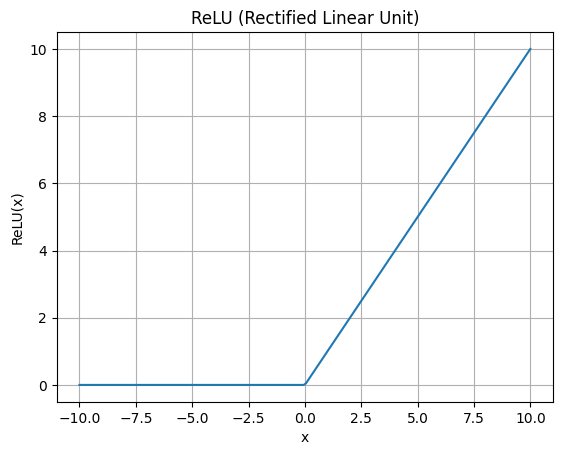

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-10, 10, 200)
y = np.maximum(0, x)

plt.plot(x, y)
plt.title("ReLU (Rectified Linear Unit)")
plt.xlabel("x")
plt.ylabel("ReLU(x)")
plt.grid(True)
plt.show()

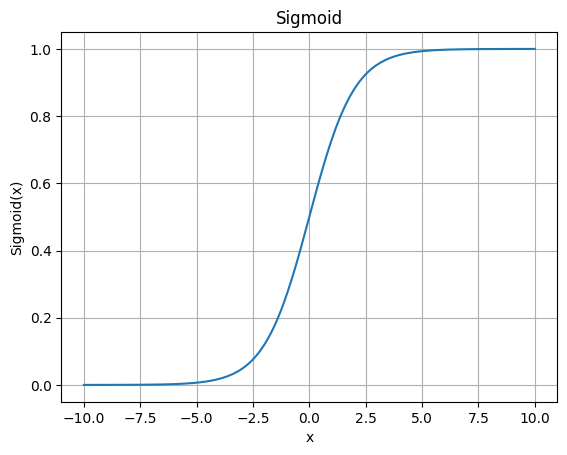

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-10, 10, 200)
y = 1 / (1 + np.exp(-x))

plt.plot(x, y)
plt.title("Sigmoid")
plt.xlabel("x")
plt.ylabel("Sigmoid(x)")
plt.grid(True)
plt.show()

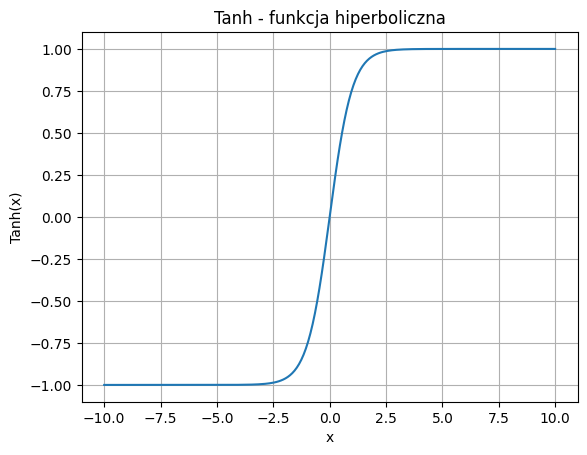

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-10, 10, 200)
y = np.tanh(x)

plt.plot(x, y)
plt.title("Tanh - funkcja hiperboliczna")
plt.xlabel("x")
plt.ylabel("Tanh(x)")
plt.grid(True)
plt.show()

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, Sequential

model = Sequential([
    layers.Flatten(input_shape=(28, 28, 1)),
    layers.Dense(256, activation="relu"),
    layers.Dropout(0.3),
    layers.Dense(128, activation="relu"),
    layers.Dropout(0.3),
    layers.Dense(10, activation="softmax")
])

model.compile(
    optimizer="adam",
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

history = model.fit(
    x_train, y_train,
    batch_size=32,
    epochs=10,
    validation_data=(x_test, y_test)
)

loss, accuracy = model.evaluate(x_test, y_test, verbose=0)
print(f"Strata (loss): {loss:.4f}, Dokładność (accuracy): {accuracy:.4f}")

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.8667 - loss: 0.4341 - val_accuracy: 0.9655 - val_loss: 0.1117
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 5ms/step - accuracy: 0.9600 - loss: 0.1275 - val_accuracy: 0.9714 - val_loss: 0.0927
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9716 - loss: 0.0917 - val_accuracy: 0.9755 - val_loss: 0.0801
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.9778 - loss: 0.0730 - val_accuracy: 0.9786 - val_loss: 0.0723
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9792 - loss: 0.0653 - val_accuracy: 0.9771 - val_loss: 0.0777
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9814 - loss: 0.0564 - val_accuracy: 0.9798 - val_loss: 0.0680
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9847 - loss: 0.0478 - val_accuracy: 0.9787 - val_loss: 0.0735
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9856 - loss: 0

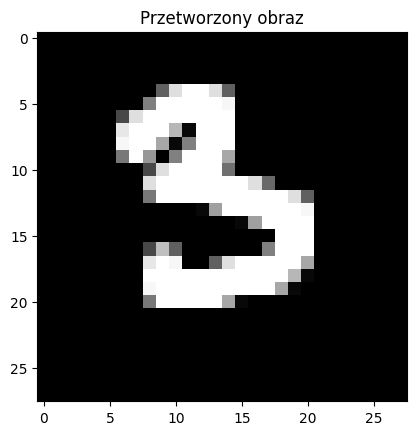

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Rozpoznana cyfra: 3


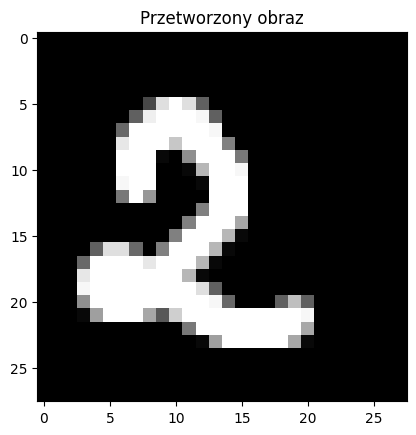

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
Rozpoznana cyfra: 2


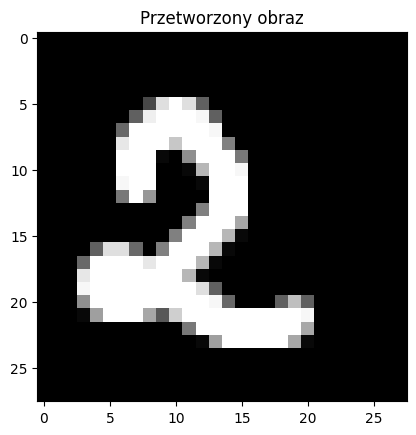

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
Rozpoznana cyfra: 2


In [ ]:
from pathlib import Path
from PIL import Image, ImageOps

#Pętla przechodzi przez wszystkie pliki z rozszerzeniem .png w pliku 'testowe'
#Obrazy są wczytywane w skali szarości .convert('L')
#A następnie tworzony jest negatyw - białe pismo na czarnym tle, tak jak w zbiorze uczącym, wbrew znaczeniom robi to różnicę i upewniamy się że dane maja odpowiedni wymiar i są znormalizowane
for path in Path("testowe").rglob("*.png"):
  image = Image.open(path).convert('L')
  image = ImageOps.invert(image)
  image = image.resize((28, 28))
  image = np.array(image).reshape(1, 28, 28, 1) / 255.0

#Wyświetlamy obraz
  plt.imshow(image.reshape(28, 28), cmap='gray')
  plt.title('Przetworzony obraz')
  plt.show()

#Oraz dokoujemy prognozy i ją wyświetlamy
  prediction = model.predict(image)
  digit = np.argmax(prediction)
  print(f"Rozpoznana cyfra: {digit}")